In [ ]:
print('peter zorve')

peter zorve


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'ORIGINAL IMAGE')

<Figure size 432x288 with 0 Axes>

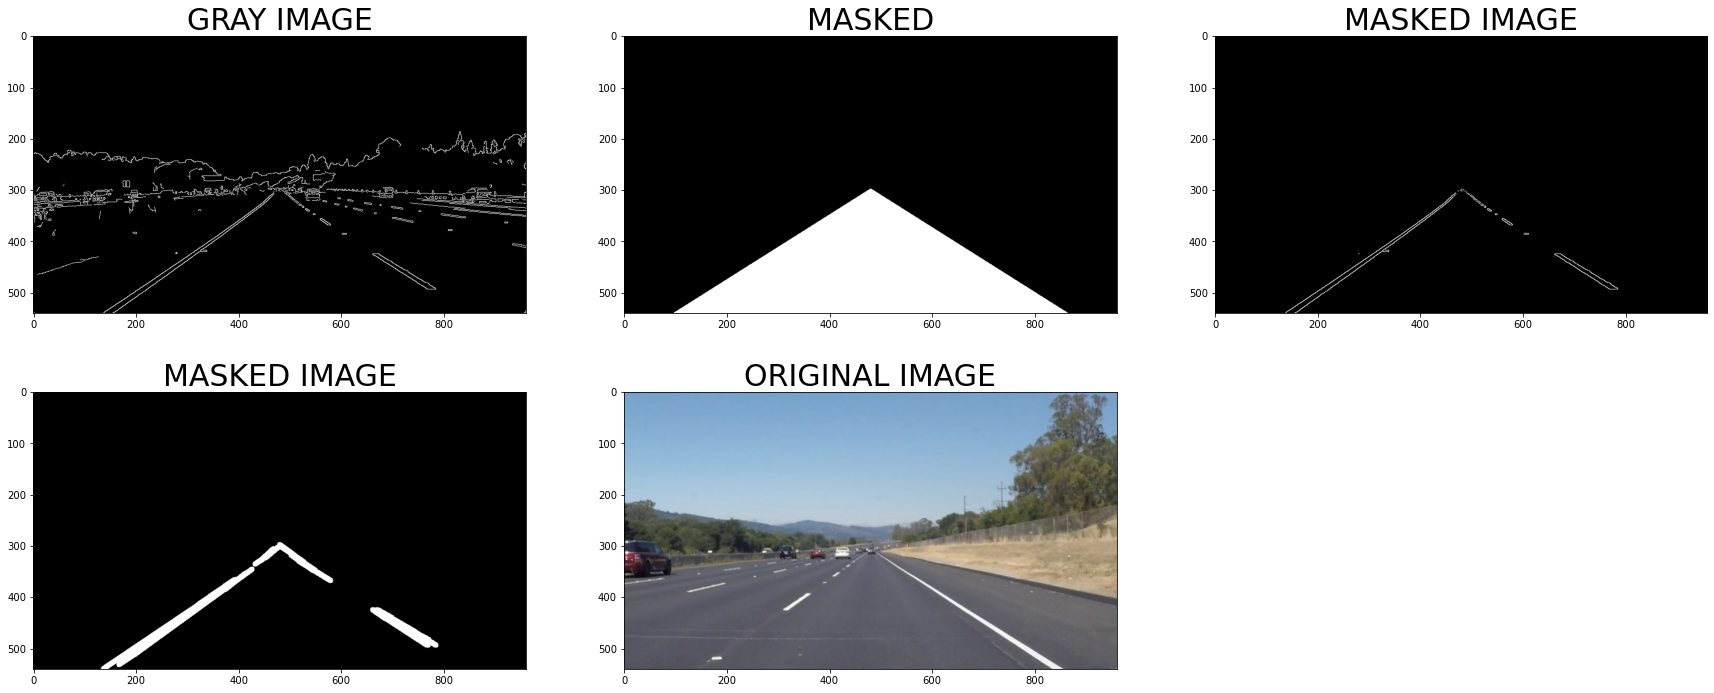

In [ ]:
path = "C:/Users/Omistaja/Desktop/deep_learning_images/peterzorve.JPG"
path = "C:/Users/Omistaja/Desktop/deep_learning/cv_challenge_self_driving_cars/test_images/solidWhiteRight.jpg"

bgr_image   = cv2.imread(path)
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB) 


def canny(path):
     bgr_image   = cv2.imread(path)                           
     gray_image  = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY) 
     canny_image = cv2.Canny(gray_image, 100, 200)
     return canny_image                         

canny_image = canny("C:/Users/Omistaja/Desktop/deep_learning/cv_challenge_self_driving_cars/test_images/solidYellowLeft.jpg")

def masking(image):
     triangle = np.array([  [  (int( 0.1* canny_image.shape[1]),  int( canny_image.shape[0]) ),    
                               (int( 0.9* canny_image.shape[1]),  int( canny_image.shape[0]) ), 
                               (int( 0.5* canny_image.shape[1]),  int(  0.55 * canny_image.shape[0]))    ]  ])
     mask = np.zeros_like(image)
     cv2.fillPoly(mask, triangle, 255)
     masked_image = cv2.bitwise_and(image, mask)
     return mask, masked_image

mask, masked_image = masking(canny_image)   

# print(masked_image.shape())


lane_lines = cv2.HoughLinesP(masked_image, 4, np.pi/180, 50, None, minLineLength=20, maxLineGap=10)

def show_lines(image, lines):
     image_with_lines = np.zeros_like(image)
     if lines is not None:
          for line in lines:
               # print(line)
               x1, y1, x2, y2, = line.reshape(4)
               cv2.line(image_with_lines, (x1, y1), (x2, y2), (255, 0, 0), 10)     
     return image_with_lines

line_image = show_lines(masked_image, lane_lines)

rgb_image_copy = np.copy(rgb_image)

# cv2.addWeighted(bgr_image, 0.8, line_image, 0.3, 1)

# combined_image = cv2.addWeighted(rgb_image_copy, 0.8,  line_image, 1, 0)


fig = plt.figure()
plt.figure(figsize=(30, 12))

plt.subplot(2, 3, 1)
plt.imshow(canny_image, cmap='gray')
plt.title('GRAY IMAGE', fontsize=30)

plt.subplot(2, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('MASKED', fontsize=30)


plt.subplot(2, 3, 3)
plt.imshow(masked_image, cmap='gray')
plt.title('MASKED IMAGE', fontsize=30)

plt.subplot(2, 3, 4)
plt.imshow(line_image, cmap='gray')
plt.title('MASKED IMAGE', fontsize=30)

plt.subplot(2, 3, 5)
plt.imshow(rgb_image_copy, cmap='gray')
plt.title('ORIGINAL IMAGE', fontsize=30)


# plt.subplot(2, 3, 6)
# plt.imshow(combined_image, cmap='gray')
# plt.title('ORIGINAL IMAGE', fontsize=30)

#      return 

# path = "C:/Users/Omistaja/Desktop/deep_learning/cv_challenge_self_driving_cars/test_images/solidYellowLeft.jpg"
# filters_kernels(path)

In [178]:
video_path = "C:/Users/Omistaja/Desktop/deep_learning/cv_challenge_self_driving_cars/test_videos/challenge.mp4"
video = cv2.VideoCapture(video_path)


size = (int(video.get(3)), int(video.get(4)))

while True:
    ret, frame = video.read()
    if cv2.waitKey(10) == ord('q'):
        break

#         frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         frame_copy = frame.copy()
#         h = frame.shape[0]
#         w = frame.shape[1]

#         polygon = np.array([[[w, h], [int(w/2), int(h * 0.55)], [int(w - w * 0.8), h]]])
#         mask = np.zeros_like(frame_gray)
#         mask = cv2.fillPoly(mask, polygon, 255)

#         blur = cv2.GaussianBlur(frame_gray, (5, 5), 0)
#         edges = cv2.Canny(blur, 100, 200)

#         match = cv2.bitwise_and(edges, mask)

#         lines = cv2.HoughLinesP(match, 4, np.pi / 180, 100, np.array([]), minLineLength=1, maxLineGap=50)
#         img_lines = frame.copy()
#         for i in range(len(lines)):
#             for x1, y1, x2, y2 in lines[i]:
#                 cv2.line(img_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

#         cv2.imshow('video', img_lines)
#         # result.write(img_lines)
#     else:
#         vid.set(cv2.CAP_PROP_POS_FRAMES, 0)
#         continue

#     if cv2.waitKey(10) == ord('q'):
#         break

# vid.release()

KeyboardInterrupt: 